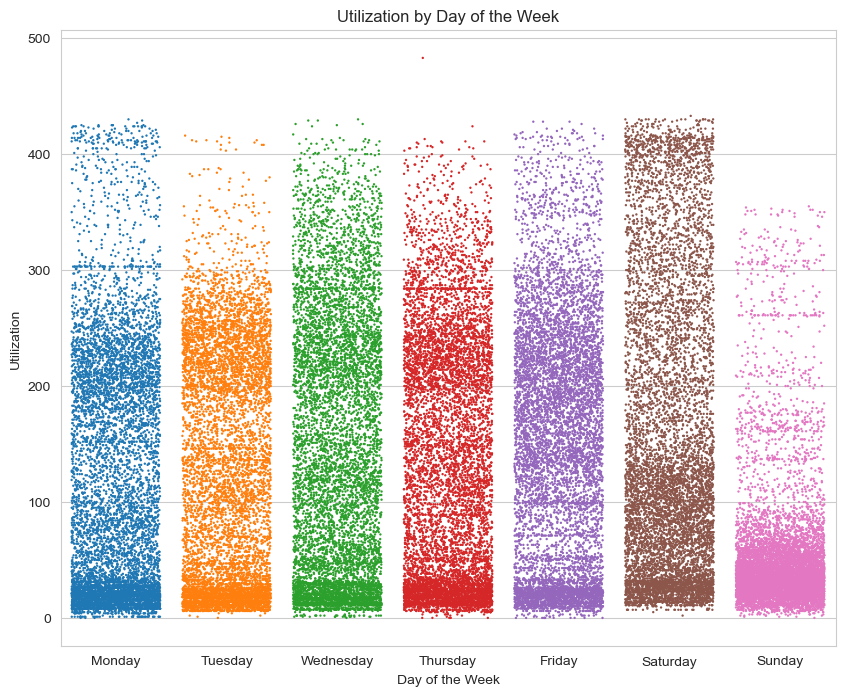

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('./data/stadtgarage.csv')
df = pd.option_context('mode.use_inf_as_na', True)
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
start_date = pd.to_datetime('2023-11-30') 
end_date = pd.to_datetime('2024-11-12')
df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
df = df[df['measurement_name'] == 'utilization']
df['day_of_week'] = df['timestamp'].dt.day_name()
df['weekday_num'] = df['timestamp'].dt.dayofweek
df = df.sort_values('weekday_num')

plt.figure(figsize=(10, 8))
sns.stripplot(data=df, x='day_of_week', y='value', hue='day_of_week', jitter=0.4, palette='tab10', size=1.7)

plt.xticks(ticks=range(7))  # Label x-axis with day names
plt.xlabel('Day of the Week')
plt.ylabel('Utilization')
plt.title('Utilization by Day of the Week')
plt.legend([], [], frameon=False)  # Disable legend
plt.show()

C:\Users\kircs\AppData\Local\Temp\ipykernel_28336\2186963931.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)

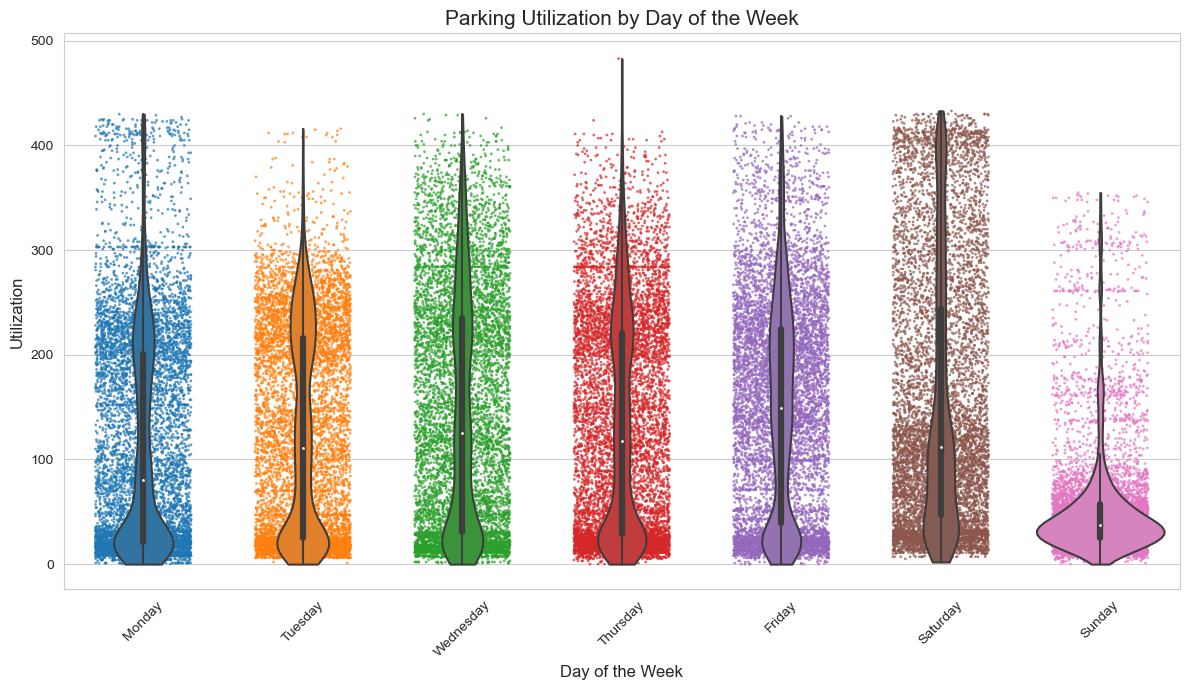

In [58]:
plt.figure(figsize=(12, 7))

sns.stripplot(
        data=df,
        x='day_of_week', 
        y='value',
        palette='tab10',
        size=2, 
        jitter=0.3,
        alpha=0.7,
        zorder=1
    )

sns.violinplot(
        data=df, 
        x='day_of_week', 
        y='value',
        cut=0,
        palette='tab10',
        zorder=2
    )
        
# Customize plot
plt.title('Parking Utilization by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Utilization', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()

C:\Users\kircs\AppData\Local\Temp\ipykernel_28336\2236399640.py:15: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

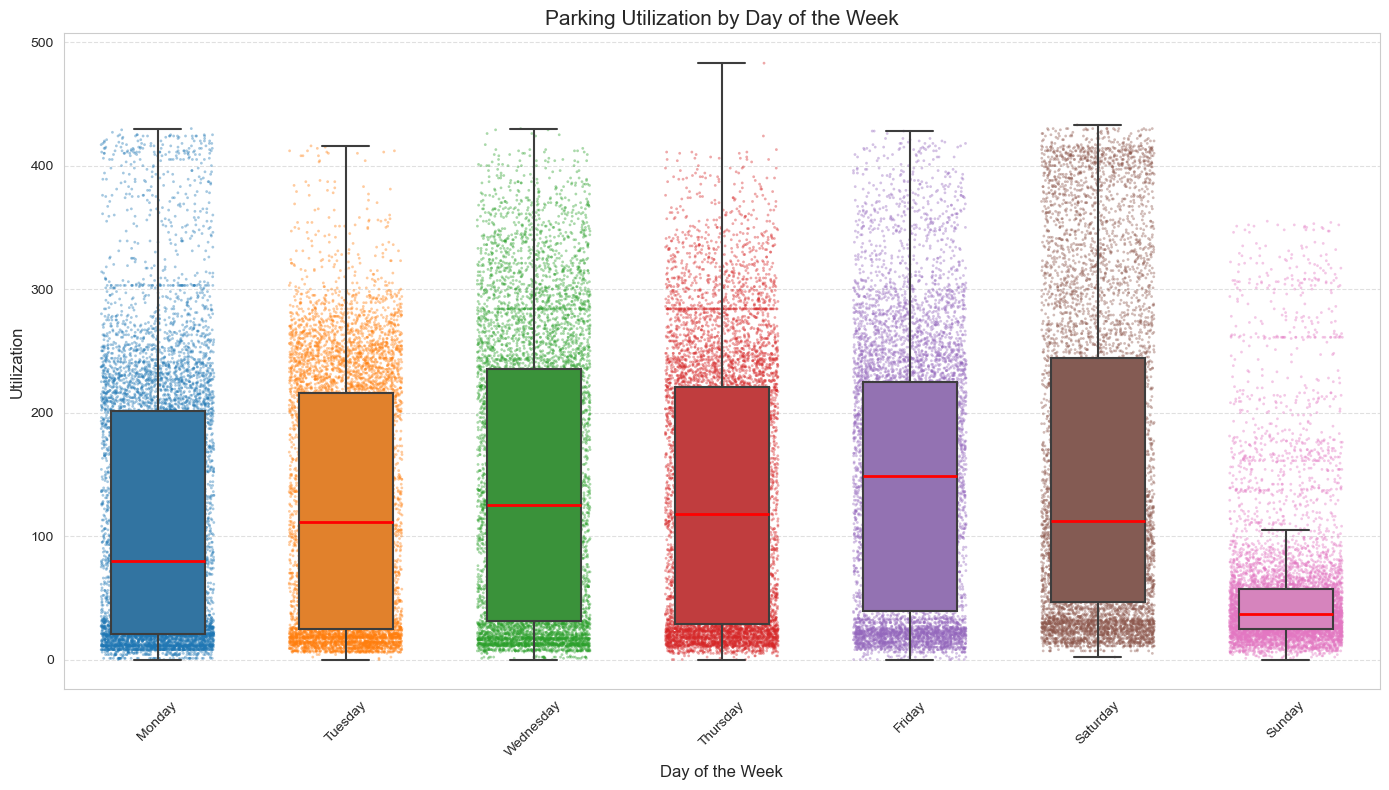

In [81]:
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=df, 
    x='day_of_week', 
    y='value',
    width=0.5,  # Adjust box width
    medianprops=dict(color="red", linewidth=2),  # Highlight median
    boxprops={"zorder": 2},
    zorder=2,
    fliersize=0,
    showcaps=True
    )

sns.stripplot(
    data=df,
    x='day_of_week', 
    y='value',
    palette='tab10',
    size=2, 
    alpha=0.4,
    jitter=0.3,
    zorder=1,
    )
       
plt.title('Parking Utilization by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Utilization', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Daily Utilization Statistics:
             Median        Mean     Std Dev  Deviation
day_of_week                                           
Friday        149.0  148.271312  103.226575  87.620211
Monday         80.0  114.538694  104.389523  87.491972
Saturday      112.0  152.765750  123.598757  98.879838
Sunday         37.0   53.539602   55.193813  29.313803
Thursday      118.0  132.724162  103.583583  90.697825
Tuesday       111.0  125.325044   97.861615  87.047450
Wednesday     125.0  143.094113  110.943964  96.536654


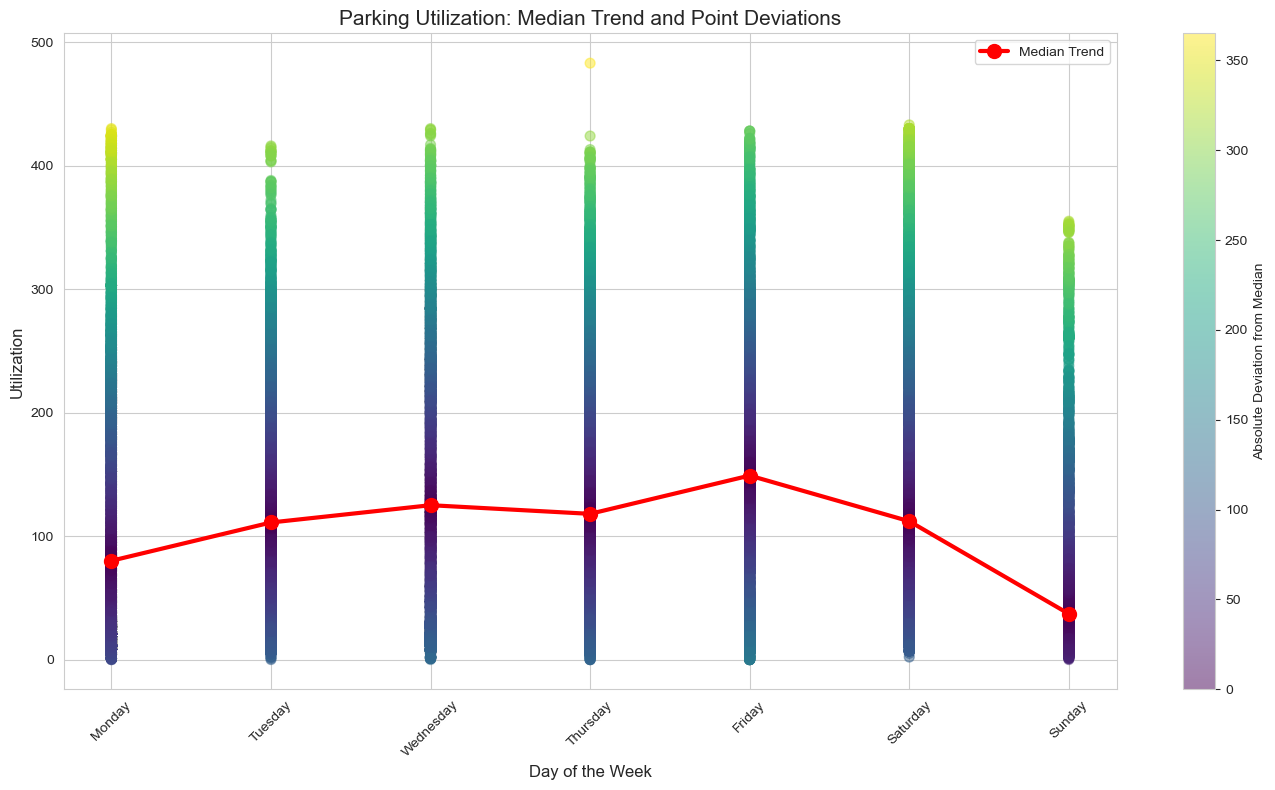

In [80]:
import numpy as np

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
 # Calculate median for each day
median_by_day = df.groupby('day_of_week')['value'].median().reindex(day_order)

plt.figure(figsize=(14, 8))
    
    # Scatter plot with deviation from median
scatter = plt.scatter(
        df['day_of_week'], 
        df['value'],
        c=np.abs(df['value'] - df['day_of_week'].map(median_by_day)),
        cmap='viridis',
        alpha=0.5,
        s=50
    )
    
# Plot median trend line
plt.plot( 
    day_order,
    median_by_day,
    color='red', 
    linewidth=3, 
    marker='o', 
    markersize=10,
    label='Median Trend'
    )
    
plt.title('Parking Utilization: Median Trend and Point Deviations', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Utilization', fontsize=12)
plt.xticks(rotation=45)
    
# Add colorbar to show deviation magnitude
plt.colorbar(scatter, label='Absolute Deviation from Median')
    
# Add statistical summary
day_stats = df.groupby('day_of_week')['value'].agg([
        ('Median', 'median'), 
        ('Mean', 'mean'), 
        ('Std Dev', 'std'), 
        ('Deviation', lambda x: np.abs(x - x.median()).mean())
    ])
    
print("Daily Utilization Statistics:")
print(day_stats)
    
plt.tight_layout()
plt.legend()
plt.show()


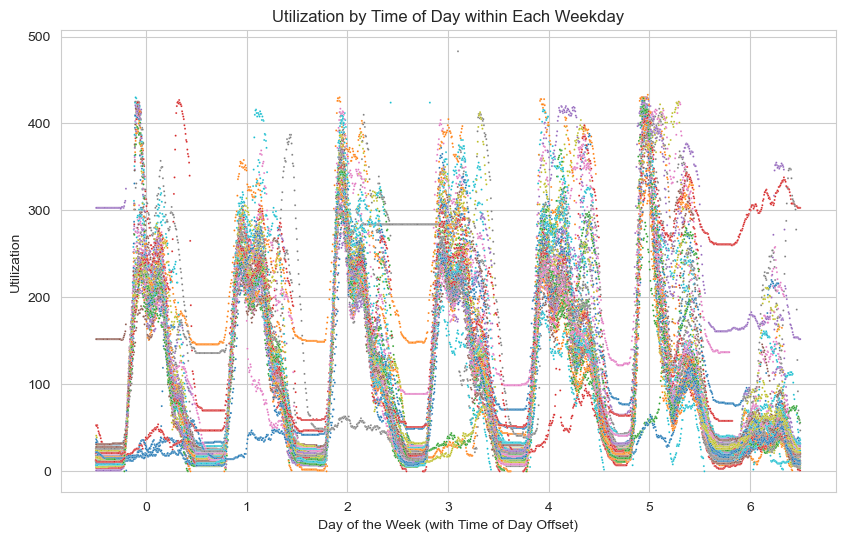

In [96]:
plt.figure(figsize=(10, 6))
df['time_of_day'] = df['timestamp'].dt.hour + df['timestamp'].dt.minute / 60
# Extract week number for distinct coloring
df['week'] = df['timestamp'].dt.isocalendar().week
sns.scatterplot(
    data=df,
    x=df['weekday_num'] + (df['time_of_day'] / 24) - 0.5,  # Offsets within each day
    y='value',
    hue='week',
    palette='tab10',
    s=2
)
plt.xticks(ticks=range(7))
plt.xlabel('Day of the Week (with Time of Day Offset)')
plt.ylabel('Utilization')
plt.title('Utilization by Time of Day within Each Weekday')
plt.legend([], [], frameon=False)  # Disable legend
plt.show()